In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.datasets import mnist

**Downloading Mnist Dataset**

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Data Pre-processing**

In [13]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [10]:
X_train = x_train.reshape(60000,28,28,1)

In [14]:
X_test = x_test.reshape(10000,28,28,1)

In [15]:
X_train=X_train.astype('float32')/255

In [16]:
X_test=X_test.astype('float32')/255

In [19]:
Y_train = to_categorical(y_train,num_classes=10)

In [20]:
Y_test = to_categorical(y_test,num_classes=10)

**Visualizing Dataset**

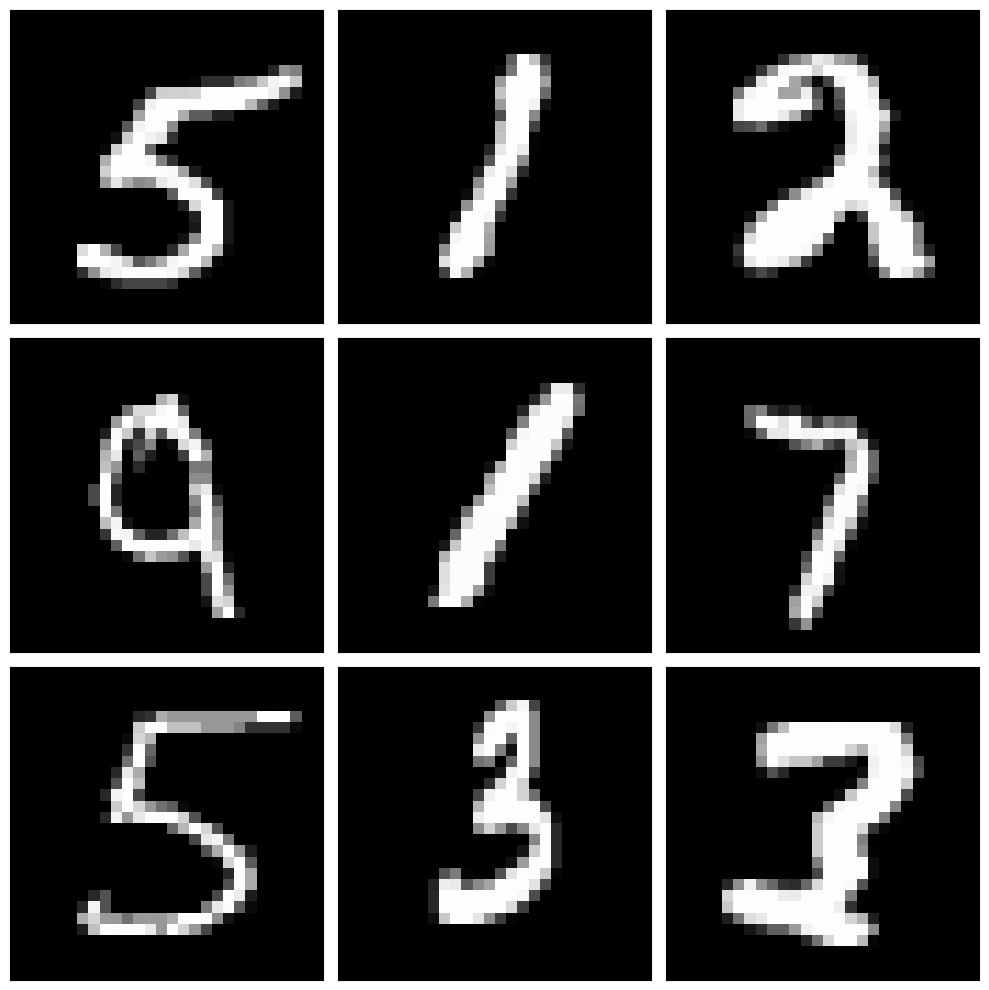

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
  image_index = np.random.randint(x_train.shape[0])

  image, label = x_train[image_index], y_train[image_index]
  image = image.reshape(28, 28)
  ax.imshow(image, cmap='gray')

  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()

**Creating CNN model**

In [26]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = "relu", input_shape = (28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation = "relu"))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [27]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)               

**Training Model**

In [29]:
model.fit(X_train,Y_train, epochs=5,batch_size=32, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1441 - accuracy: 0.9554 - val_loss: 0.0521 - val_accuracy: 0.9820
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0482 - accuracy: 0.9852 - val_loss: 0.0362 - val_accuracy: 0.9878
Epoch 3/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0287 - val_accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0243 - accuracy: 0.9921 - val_loss: 0.0321 - val_accuracy: 0.9892
Epoch 5/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0189 - accuracy: 0.9939 - val_loss: 0.0271 - val_accuracy: 0.9907


**Evaluation**

In [30]:
test_loss, test_accuracy = model.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0271 - accuracy: 0.9907


In [31]:
train_loss, train_accuracy = model.evaluate(X_train,Y_train)

1875/1875 [==============================] - 17s 9ms/step - loss: 0.0071 - accuracy: 0.9982


In [32]:
print(f'tarin_accuracy:{train_accuracy}  test_accuracy:{test_accuracy}')

tarin_accuracy:0.9982333183288574  test_accuracy:0.9907000064849854
